## Lab3 testbench
Run this cell before running any other cells

In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

In [2]:
LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

2025-02-12 17:48:56,920 | INFO     |: info
2025-02-12 17:48:56,920 | WARNING  |: warning
2025-02-12 17:48:56,921 | ERROR    |: error
2025-02-12 17:48:56,921 | CRITICAL |: critical


In [3]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-02-12 17:48:57,868 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:c3:e4:25:23:51
2025-02-12 17:49:01,730 | INFO     |: Connected to c0:c3:e4:25:23:51


C:\Users\Administrator\Documents\ECE4160\Lab3\tof_python\base_ble.py:104: FutureWarning: This method will be removed future version, pass the callback to the BleakClient constructor instead.
  self.client.set_disconnected_callback(self.disconnect_handler)


In [179]:
import re

tof_data1_index = 0
tof_data1 = [[0.0, 0.0] for _ in range(2500)]
def tof_data_collect(uuid, byte_array):
    global tof_data1_index
    msg = ble.bytearray_to_string(byte_array)
    data = re.findall(r'-?\d+\.\d+', msg)
    tof_data1[tof_data1_index] = [float(num) for num in data]
    tof_data1_index += 1

ble.start_notify(ble.uuid['RX_STRING'], tof_data_collect)


In [196]:
tof_data1_index = 0
tof_data1 = [[0.0, 0.0] for _ in range(2500)]

In [197]:
ble.send_command(CMD.START_RECORD_DATA, "2")

In [198]:
print(tof_data1_index)
print(tof_data1[:tof_data1_index])

16
[[461930.0, 202.0], [462028.0, 219.0], [462125.0, 216.0], [462286.0, 358.0], [462384.0, 149.0], [462483.0, 172.0], [462581.0, 134.0], [462781.0, 105.0], [462880.0, 109.0], [462978.0, 91.0], [463078.0, 103.0], [463175.0, 112.0], [463274.0, 92.0], [463372.0, 208.0], [463470.0, 144.0], [463780.0, 108.0]]


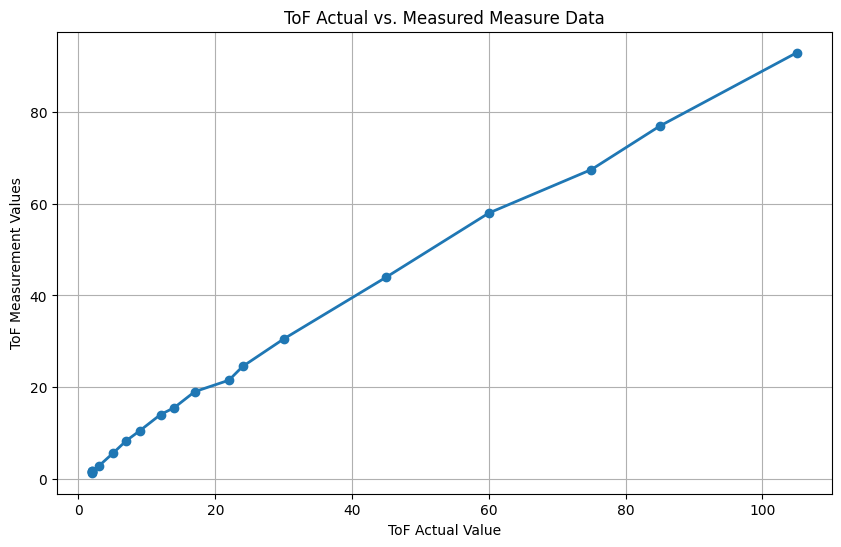

2025-02-12 12:17:20,975 | INFO     |: Disconnected from C0:C3:E4:25:23:51


In [202]:
import matplotlib.pyplot as plt
measure = [[2, 1.5], [2, 1.4], [2, 1.3], [2, 1.6], [2, 1.7], [3, 2.8], [5, 5.5], [7, 8.3], [9, 10.5], [12, 14], [14, 15.5], [17, 19], [22, 21.5], [24, 24.5], [30, 30.5], [45, 44], [60, 58], [75, 67.5], [85, 77], [105, 93]]

x, y = zip(*measure)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('ToF Actual Value')
plt.ylabel('ToF Measurement Values')
plt.title('ToF Actual vs. Measured Measure Data')

# Displaying the grid
plt.grid(True)

# Show plot
plt.show()

In [39]:
ble = get_ble_controller()
ble.connect()

2025-02-12 17:45:20,508 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:c3:e4:25:23:51
2025-02-12 17:45:24,555 | INFO     |: Connected to c0:c3:e4:25:23:51


In [10]:
import re

sensor_data_index = 0
sensor_data = [[0.0 for _ in range(6)] for _ in range(2500)]

msg = None

def data_collect(uuid, byte_array):
    global sensor_data_index
    msg = ble.bytearray_to_string(byte_array)
    data = re.findall(r'-?\d+\.\d+', msg)
    sensor_data[sensor_data_index] = [float(num) for num in data]
    sensor_data_index += 1

ble.start_notify(ble.uuid['RX_STRING'], data_collect)


In [12]:
ble.send_command(CMD.START_RECORD_DATA, "2")

In [19]:
print(sensor_data_index)

238


In [15]:
for i in range(15):
    print(sensor_data[i])

[621921.0, -434.281, 1302.373, 117.731, 459.0, 106.0]
[621921.0, -434.281, 1302.373, 117.731, 459.0, 106.0]
[621937.0, -695.419, 1593.552, 117.769, 459.0, 106.0]
[621937.0, -695.419, 1593.552, 117.769, 459.0, 106.0]
[621955.0, -865.167, 1782.831, 117.769, 413.0, 106.0]
[621955.0, -865.167, 1782.831, 117.769, 413.0, 106.0]
[621972.0, -975.551, 1905.914, 117.761, 413.0, 113.0]
[621972.0, -975.551, 1905.914, 117.761, 413.0, 113.0]
[621994.0, -1047.415, 1985.912, 117.764, 413.0, 113.0]
[621994.0, -1047.415, 1985.912, 117.764, 413.0, 113.0]
[622009.0, -1094.149, 2037.942, 117.732, 413.0, 113.0]
[622009.0, -1094.149, 2037.942, 117.732, 413.0, 113.0]
[622028.0, -1124.565, 2071.769, 117.745, 413.0, 113.0]
[622028.0, -1124.565, 2071.769, 117.745, 413.0, 113.0]
[622044.0, -1144.39, 2093.818, 117.748, 425.0, 113.0]


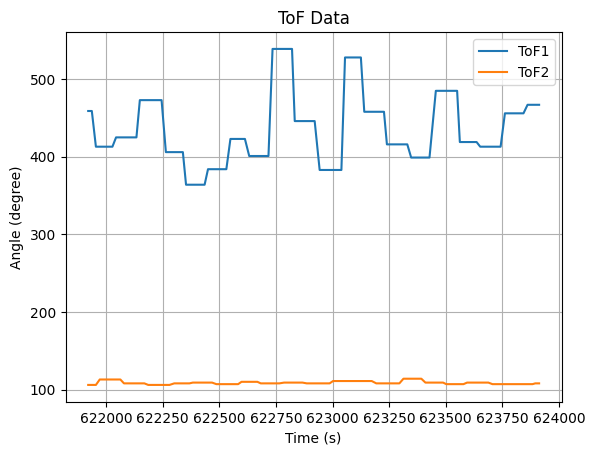

In [21]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array(sensor_data)
time = data[:sensor_data_index, 0]
pitch = data[:sensor_data_index, 1]
roll = data[:sensor_data_index, 2]
yaw = data[:sensor_data_index, 3]
tof1 = data[:sensor_data_index, 4]
tof2 = data[:sensor_data_index, 5]

plt.figure()
plt.plot(time, tof1, label='ToF1')
plt.plot(time, tof2, label='ToF2')
plt.title('ToF Data')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degree)')
plt.legend()
plt.grid()
plt.show()